# FIT 5196: Assignment 2

## Task 1: Data Cleaning <br><br>

**Name:** Chaitanya Tambolkar   

**Student ID:** 34093117

**Name:** Fahmid Tawsif Khan Chowdhury 

**Student ID:** 34121315

# 1. Introduction

In this task, we were assigned to analyze, identify, and address issues in three datasets. The problems fell into three main categories:

- Correcting incorrect data and anomalies.
- Detecting and removing outliers.
- Imputing missing data.

We began with an exploratory data analysis (EDA) to gain an initial understanding of the dataset’s structure and guide us in identifying errors. The initial EDA revealed some errors, and by closely examining relationships between columns, we were able to uncover additional issues.

After resolving these errors, we moved on to outlier detection and removal. While trying various univariate approaches, we realized that one column, delivery_charges, was influenced by multiple features. As a result, we opted for a multivariate approach, using linear regression to identify and remove outliers effectively.

Finally, detecting missing values was straightforward. By applying functions and methods from previous steps, we successfully handled all imputations and ensured the datasets were complete.

**Import Libraries**

In [1]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import radians, cos, sin, asin, sqrt
import numpy as np
from datetime import datetime
import nltk
nltk.download('vader_lexicon')
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
import matplotlib.pyplot as plt
import ast
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/fahmidtawsifkhanchowdhury/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Load the dataset
df_dirty = pd.read_csv('Group130_dirty_data.csv')

# 2. Dirty Data: Exploratory Data Analysis

In [3]:
df_dirty.head(2)

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD021989,ID0591408809,2019-09-22,Nickolson,"[('pearTV', 2), ('Candle Inferno', 2), ('iAssi...",11280,84.06,-37.819774,144.961375,25,14450.31,Spring,True,0.7308,did not last long barely a month after getting...,False
1,ORD365253,ID0331420064,2019-01-27,Bakers,"[('Alcon 10', 1), ('iStream', 1), ('Toshika 75...",17740,62.75,-37.820335,145.001718,5,16915.75,Summer,False,1.2845,microphone not working! people on the other en...,False


In [4]:
df_dirty.describe()

,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,distance_to_nearest_warehouse
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000
mean,14003.710000,76.237320,-27.942727,135.095500,11.12000,12704.429700,1.103460
std,7792.338009,14.298834,41.353091,41.352510,8.79775,7229.074939,0.513740
min,1010.000000,47.660000,-37.831769,-37.827984,0.00000,964.690000,0.026500
25%,8130.000000,65.622500,-37.818726,144.947888,5.00000,7477.242500,0.730300
50%,12400.000000,76.660000,-37.813071,144.963299,10.00000,11317.930000,1.058100
75%,19530.000000,83.030000,-37.804831,144.978216,15.00000,17019.840000,1.436575
max,43520.000000,116.630000,145.011618,145.016573,25.00000,39256.310000,2.781600


In [5]:
# Sort the dataframe by 'customer_lat' in ascending order
df_sorted_by_long = df_dirty.sort_values(by='customer_long', ascending=True)

# View the first 10 rows of the sorted dataframe
df_sorted_by_long.head(10)

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
316,ORD477513,ID1897799257,2019-11-27,Nickolson,"[('Toshika 750', 2), ('iStream', 1), ('Lucent ...",13430,93.30,144.955002,-37.827984,0,13523.30,Spring,True,1.6519,totally stinks. takes 10 hrs. to charge. ... t...,False
341,ORD393585,ID0107156453,2019-03-26,Nickolson,"[('iAssist Line', 2), ('Lucent 330S', 2), ('iS...",7060,81.81,144.983476,-37.827631,0,7141.81,Autumn,True,1.5846,"best black friday deal :) i'm not a ""bandwagon...",True
59,ORD085987,ID4380043595,2019-07-22,Bakers,"[('Olivia x460', 2), ('pearTV', 1), ('iAssist ...",13210,82.64,144.988835,-37.825322,15,11311.14,Winter,True,1.7963,five stars great phone got it the next day!,True
32,ORD408195,ID6202471409,2019-02-24,Nickolson,"[('Candle Inferno', 2), ('Universe Note', 1), ...",4460,61.09,144.980524,-37.821566,0,4521.09,Summer,False,1.0200,made a mistake of buying this xperia xa1. the ...,False
355,ORD089498,ID0589500304,2019-02-04,Nickolson,"[('Universe Note', 2), ('iAssist Line', 2), ('...",12575,96.34,144.957411,-37.820228,10,11413.84,Summer,True,1.0829,the camera is awesome for the price! love this...,True
163,ORD431002,ID0846547082,2019-05-22,Nickolson,"[('pearTV', 1), ('Olivia x460', 2), ('iStream'...",8910,63.19,144.968759,-37.820149,15,7636.69,Autumn,True,0.1865,two stars the charger never come,False
303,ORD127956,ID6167191702,2019-06-21,Thompson,"[('Universe Note', 1), ('Thunder line', 1), ('...",27850,51.00,144.954940,-37.818801,10,25116.00,Winter,False,0.9718,two stars almost impossible to hook up to any ...,False
110,ORD444220,ID1560149460,2019-11-09,Thompson,"[('Lucent 330S', 2), ('iAssist Line', 2), ('Un...",11585,102.61,144.938397,-37.816116,0,11687.61,Spring,True,0.8535,"everything was everything not bad, fast shippi...",True
370,ORD236867,ID6167489473,2019-01-19,Nickolson,"[('pearTV', 1), ('Lucent 330S', 1)]",7540,73.28,144.961098,-37.816019,15,6482.28,Summer,False,0.7968,no accessories but still a great deal didn't c...,True
164,ORD239935,ID6167344558,2019-10-07,Nickolson,"[('iStream', 2), ('Candle Inferno', 2), ('pear...",25370,83.32,144.972188,-37.815933,10,22916.32,Spring,True,0.3763,one star these phones aren't for verizon ... i...,False


- Some of the values in customer_lat and customer_long appear to be outside their valid ranges. The maximum customer_lat is 145.011618, which should be impossible as latitude is confined to [-90, 90].<br><br>

- The minimum value of customer_long is -37.827984. This can a valid value for latitude, however, this value is very far away from the mean of 135.095500. This suggest potential anomalies. <br><br>

- After further inspection, we see that the values for customer_lat and customer_long have been swapped at certain instances, specifically where customer_long is around -37.  

In [6]:
df_dirty.describe(include = 'O')

,order_id,customer_id,date,nearest_warehouse,shopping_cart,season,latest_customer_review
count,500,500,500,500,500,500,500
unique,500,492,295,6,466,8,500
top,ORD021989,ID0579508239,2019-01-04,Thompson,"[('Alcon 10', 1), ('Olivia x460', 2)]",Spring,did not last long barely a month after getting...
freq,1,2,5,204,4,132,1


An error counter (error_count) is initialized to 0. This counter will be incremented each time an anomaly is detected and fixed.

change_order_ids is a list created to track the chnages made in each row by order_id. Duplicate order_ids in the list would suggest more than one value fixed in a row represented by the respetive order_id.

- The presence of 8 unique values suggests some potential issues here. Typically, we would expect only four seasons: Spring, Summer, Autumn, and Winter.<br><br>

- nearest_warehouse says 6 unique values whereas, there should be only 3.

In [7]:
# View all unique values in 'nearest_warehouse'
df_dirty['nearest_warehouse'].value_counts()

Thompson     204
Nickolson    180
Bakers       101
bakers         8
thompson       4
nickolson      3
Name: nearest_warehouse, dtype: int64

In [8]:
# View all unique values in 'season' column
df_dirty['season'].value_counts()

Spring    132
Summer    122
Autumn    114
Winter    113
summer      6
autumn      5
spring      5
winter      3
Name: season, dtype: int64

In [9]:
check_date_type = df_dirty.copy()
check_date_type['copy_date'] = pd.to_datetime(check_date_type['date'], errors='coerce')

In [10]:
check_date_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       500 non-null    object        
 1   customer_id                    500 non-null    object        
 2   date                           500 non-null    object        
 3   nearest_warehouse              500 non-null    object        
 4   shopping_cart                  500 non-null    object        
 5   order_price                    500 non-null    int64         
 6   delivery_charges               500 non-null    float64       
 7   customer_lat                   500 non-null    float64       
 8   customer_long                  500 non-null    float64       
 9   coupon_discount                500 non-null    int64         
 10  order_total                    500 non-null    float64       
 11  season             

In [11]:
invalid_dates = check_date_type[check_date_type['copy_date'].isna()]
print(f"Invalid dates (could not be converted to datetime):")
print(invalid_dates[['order_id', 'copy_date','date']])

Invalid dates (could not be converted to datetime):
      order_id copy_date        date
13   ORD141248       NaT  2019-25-07
45   ORD136362       NaT  2019-17-05
51   ORD185820       NaT  2019-19-07
71   ORD336942       NaT  2019-13-05
80   ORD394540       NaT  2019-25-10
119  ORD297665       NaT  2019-30-01
151  ORD478503       NaT  2019-24-01
154  ORD094686       NaT  2019-30-09
155  ORD275612       NaT  2019-23-10
168  ORD382416       NaT  2019-15-10
175  ORD195030       NaT  2019-21-05
255  ORD289814       NaT  2019-26-05
268  ORD424320       NaT  2019-17-07
285  ORD485363       NaT  2019-15-07
304  ORD402565       NaT  2019-27-03
391  ORD171494       NaT  2019-26-08
398  ORD280966       NaT  2019-26-04
401  ORD480080       NaT  2019-23-04
427  ORD463755       NaT  2019-18-01
434  ORD015979       NaT  2019-19-02
461  ORD453312       NaT  2019-28-04
466  ORD158175       NaT  2019-24-10


In [12]:
# List of incorrect dates with their corresponding order IDs
incorrect_dates = {
    'ORD453312': '2019-28-04', 'ORD275612': '2019-23-10', 'ORD136362': '2019-17-05',
    'ORD015979': '2019-19-02', 'ORD382416': '2019-15-10', 'ORD485363': '2019-15-07',
    'ORD402565': '2019-27-03', 'ORD297665': '2019-30-01', 'ORD424320': '2019-17-07',
    'ORD478503': '2019-24-01', 'ORD480080': '2019-23-04', 'ORD094686': '2019-30-09',
    'ORD394540': '2019-25-10', 'ORD463755': '2019-18-01', 'ORD289814': '2019-26-05',
    'ORD185820': '2019-19-07', 'ORD158175': '2019-24-10', 'ORD195030': '2019-21-05',
    'ORD141248': '2019-25-07', 'ORD336942': '2019-13-05', 'ORD171494': '2019-26-08',
    'ORD280966': '2019-26-04'
}

## 2.1 Error Tracking

We initialized the error counter to track the number of errors found and corrected throughout the data processing. This was done by setting error_count to zero. Additionally, we created a list, changed_order_ids, to record the order IDs of rows where any changes were made. This allowed us to track which specific records had been updated during the process. As we iterated through the dataset, each time an error was identified and corrected, the respective order ID was added to the list, helping us monitor all modifications and ensuring the accuracy of our corrections. This approach provided a structured way to monitor the improvements made.

In [13]:
# Initialize error counter
error_count = 0

# Initialize a list to track order_ids with changes
changed_order_ids = []

## 2.2 Errors in `date` column

The primary objective of this code is to clean the date column in the dataset by identifying and correcting invalid date formats. The approach involves copying the original date column to preserve it for reference and then using the pd.to_datetime() function to convert the dates to the correct format. Invalid entries that fail this conversion are identified as NaT.

Next, a custom function is applied to fix these incorrect date formats, which were originally entered as YYYY-DD-MM. This function rearranges the components into the correct YYYY-MM-DD format. Once corrected, the date column is updated, and the temporary column (copy_date) is removed. Finally, the process checks for the uniqueness of order_ids to ensure no duplicates, confirming that the corrections were successful.

In [14]:
# Preserve original date column
df_dirty['copy_date'] = df_dirty['date']

# Step 1: Parse the dates assuming the correct format is day-first (DD/MM/YYYY)
df_dirty['copy_date'] = pd.to_datetime(df_dirty['copy_date'], dayfirst=True, errors='coerce')

In [15]:
# Replace the original 'date' column with 'copy_date' values
df_dirty['date'] = df_dirty['copy_date']

# Optionally, if you want to drop the 'copy_date' column after replacing
df_dirty.drop(columns=['copy_date'], inplace=True)

In [16]:
# Updating the changed_order_ids list with incorrect order IDs
changed_order_ids.extend(incorrect_dates.keys())
changed_order_ids = list(set(changed_order_ids))
error_count = len(changed_order_ids)

In [17]:
# Check if all order_ids in changed_order_ids are unique
are_ids_unique = len(changed_order_ids) == len(set(changed_order_ids))

# Step 3: Print the results
print(f"Total errors fixed: {error_count}")
print()
print(f"Changed order IDs: {changed_order_ids}")
print()
print(f"Are all order IDs in changed_order_ids unique? {are_ids_unique}")

Total errors fixed: 22

Changed order IDs: ['ORD185820', 'ORD485363', 'ORD394540', 'ORD195030', 'ORD094686', 'ORD463755', 'ORD141248', 'ORD480080', 'ORD382416', 'ORD453312', 'ORD158175', 'ORD136362', 'ORD297665', 'ORD402565', 'ORD478503', 'ORD280966', 'ORD336942', 'ORD015979', 'ORD289814', 'ORD171494', 'ORD424320', 'ORD275612']

Are all order IDs in changed_order_ids unique? True


In [18]:
df_dirty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       500 non-null    object        
 1   customer_id                    500 non-null    object        
 2   date                           500 non-null    datetime64[ns]
 3   nearest_warehouse              500 non-null    object        
 4   shopping_cart                  500 non-null    object        
 5   order_price                    500 non-null    int64         
 6   delivery_charges               500 non-null    float64       
 7   customer_lat                   500 non-null    float64       
 8   customer_long                  500 non-null    float64       
 9   coupon_discount                500 non-null    int64         
 10  order_total                    500 non-null    float64       
 11  season             

The process identified and corrected invalid date formats in the dataset, ensuring all date values now adhere to the correct YYYY-MM-DD format. This ensures that the dataset's temporal data is consistent, which is essential for analysis involving timelines, trends, or other date-related computations.

## 2.3 Errros in `season` column

In Australia, the seasons are grouped by calendar months in the following way:

* Spring - September, October and November.
* Summer - December, January and February.
* Autumn - March, April and May.
* Winter - June, July and August.

(Ref: Bureau of Meteorology: Australia)

The primary goal of this code is to ensure that the season field in the dataset is accurate based on the order dates. Since Australian seasons are grouped by specific calendar months, a function was created to map each date to its correct season. The function get_season_from_date was applied to generate a new column, correct_season, which holds the expected season based on the month of the order date.

A comparison between the season column and correct_season was conducted to identify mismatches. For rows with discrepancies, the season field was updated to the correct value derived from the date. The code tracked all errors corrected and logged the associated order_id for validation. Once the errors were fixed, temporary columns used for comparison were removed to keep the dataset clean.

In [19]:
df_dirty['date'] = pd.to_datetime(df_dirty['date'], format='%d/%m/%Y', errors='coerce')

# Function to map months to seasons in Australia
def get_season_from_date(date):
    if pd.isna(date):  # If the date is NaT, return NaN for the season
        return None
    month = date.month
    if month in [9, 10, 11]:
        return 'Spring'
    elif month in [12, 1, 2]:
        return 'Summer'
    elif month in [3, 4, 5]:
        return 'Autumn'
    elif month in [6, 7, 8]:
        return 'Winter'

# Applying the function to create a new column 'correct_season'
df_dirty['correct_season'] = df_dirty['date'].apply(get_season_from_date)

# Compare 'correct_season' with the existing 'season' column to identify mismatches
df_dirty['season_mismatch'] = df_dirty['season'] != df_dirty['correct_season']

# Fix the rows with mismatches and track errors
for idx, row in df_dirty[df_dirty['season_mismatch'] == True].iterrows():
    df_dirty.at[idx, 'season'] = row['correct_season']  # Fix the season
    error_count += 1  # Increment the error count
    changed_order_ids.append(row['order_id'])  # Track the changed order ID

In [20]:
# Check if all order IDs in changed_order_ids are unique
are_ids_unique = len(changed_order_ids) == len(set(changed_order_ids))

# Step 7: Print the results
print(f"Total errors fixed: {error_count}")
print()
print(f"Changed order IDs: {changed_order_ids}")
print()
print(f"Are all order IDs in changed_order_ids unique? {are_ids_unique}")

Total errors fixed: 49

Changed order IDs: ['ORD185820', 'ORD485363', 'ORD394540', 'ORD195030', 'ORD094686', 'ORD463755', 'ORD141248', 'ORD480080', 'ORD382416', 'ORD453312', 'ORD158175', 'ORD136362', 'ORD297665', 'ORD402565', 'ORD478503', 'ORD280966', 'ORD336942', 'ORD015979', 'ORD289814', 'ORD171494', 'ORD424320', 'ORD275612', 'ORD203552', 'ORD155932', 'ORD381492', 'ORD336209', 'ORD039305', 'ORD461512', 'ORD463529', 'ORD010125', 'ORD167565', 'ORD330628', 'ORD319742', 'ORD284876', 'ORD042242', 'ORD232016', 'ORD083672', 'ORD305556', 'ORD312349', 'ORD235025', 'ORD365301', 'ORD351733', 'ORD374931', 'ORD367888', 'ORD471394', 'ORD190308', 'ORD197459', 'ORD253048', 'ORD355012']

Are all order IDs in changed_order_ids unique? True


In [21]:
# Drop the temporary columns if no longer needed
df_dirty.drop(columns=['correct_season', 'season_mismatch'], inplace=True)

In [22]:
# View all unique values in 'season' column
unique_seasons = df_dirty['season'].unique()

print("Unique values in 'season' column:")
print(unique_seasons)

Unique values in 'season' column:
['Spring' 'Summer' 'Winter' 'Autumn']


The process successfully updated the season field for all records where discrepancies between the date and the season were found. This correction ensures that the season field is consistent with the order dates, providing accurate seasonal data for future analysis or reporting.

## 2.4 Errors in `customer_lat` and `customer_long` columns

The objective of this code is to fix incorrect latitude and longitude values in the dataset, which may have been swapped. The latitude values must lie between -90 and 90, so any latitude that falls outside this range is considered incorrect and likely swapped with the longitude value. The approach involves checking each row in the dataset for invalid latitude values and, when found, swapping the latitude and longitude values to correct the error. After the correction, the affected order_id is logged, and the total number of errors fixed is tracked. Finally, the code validates that all order_ids in the changed list are unique.

In [23]:
# Function to detect and fix latitude that is out of range
def fix_invalid_lat_long(row):
    global error_count

    # Check if latitude is outside the valid range [-90, 90]
    if row['customer_lat'] > 90 or row['customer_lat'] < -90:
        # Swap latitude and longitude if they are in the wrong positions
        row['customer_lat'], row['customer_long'] = row['customer_long'], row['customer_lat']
        error_count += 1  # Count this as one error fixed

        # Track order_id where the fix was applied
        changed_order_ids.append(row['order_id'])

    return row

# Apply the function to each row in the dataframe
df_dirty = df_dirty.apply(fix_invalid_lat_long, axis=1)

In [24]:
# Check if all values in changed_order_ids are unique
are_ids_unique = len(changed_order_ids) == len(set(changed_order_ids))

# Print the result
print(f"Total number of errors fixed: {error_count}")
print()
print(f"Changed Order IDs: {changed_order_ids}")
print()
print(f"Are all order IDs in changed_order_ids unique? {are_ids_unique}")

Total number of errors fixed: 76

Changed Order IDs: ['ORD185820', 'ORD485363', 'ORD394540', 'ORD195030', 'ORD094686', 'ORD463755', 'ORD141248', 'ORD480080', 'ORD382416', 'ORD453312', 'ORD158175', 'ORD136362', 'ORD297665', 'ORD402565', 'ORD478503', 'ORD280966', 'ORD336942', 'ORD015979', 'ORD289814', 'ORD171494', 'ORD424320', 'ORD275612', 'ORD203552', 'ORD155932', 'ORD381492', 'ORD336209', 'ORD039305', 'ORD461512', 'ORD463529', 'ORD010125', 'ORD167565', 'ORD330628', 'ORD319742', 'ORD284876', 'ORD042242', 'ORD232016', 'ORD083672', 'ORD305556', 'ORD312349', 'ORD235025', 'ORD365301', 'ORD351733', 'ORD374931', 'ORD367888', 'ORD471394', 'ORD190308', 'ORD197459', 'ORD253048', 'ORD355012', 'ORD049067', 'ORD438840', 'ORD408195', 'ORD361998', 'ORD085987', 'ORD187103', 'ORD198424', 'ORD444220', 'ORD212759', 'ORD260893', 'ORD431002', 'ORD239935', 'ORD326859', 'ORD059700', 'ORD127956', 'ORD477513', 'ORD393585', 'ORD089498', 'ORD270067', 'ORD245708', 'ORD236867', 'ORD287518', 'ORD352337', 'ORD361016

In [25]:
df_dirty[['customer_lat', 'customer_long']].describe()

,customer_lat,customer_long
count,500.000000,500.000000
mean,-37.812888,144.965662
std,0.007912,0.020856
min,-37.831769,144.919491
25%,-37.818903,144.950170
50%,-37.813522,144.964051
75%,-37.806291,144.980622
max,-37.788784,145.016573


 The latitude and longitude values in the dataset were corrected where they were swapped or incorrect.These rows had latitude values that were outside the acceptable range of [-90, 90], and the values were corrected by swapping the latitude with the longitude. All the order_ids of the corrected rows were unique, confirming that no duplicate corrections were made. As a result, the dataset now contains valid latitude and longitude values, ensuring geographic accuracy.

## 2.5 Errors in `nearest warehouse` column

The purpose of this code is to correct any errors in the nearest_warehouse field by calculating the actual nearest warehouse based on the customer’s latitude and longitude. Using the Haversine formula, the distance between the customer’s location and each of the three warehouses is calculated. For each row, the nearest warehouse is identified, and if it differs from the current value in the nearest_warehouse column, the field is updated. The process also tracks the number of corrections made and logs the order_id of each corrected entry. Finally, a check is performed to ensure the order_ids of the corrected rows are unique.

In [26]:
df_dirty['nearest_warehouse'].value_counts()

Thompson     204
Nickolson    180
Bakers       101
bakers         8
thompson       4
nickolson      3
Name: nearest_warehouse, dtype: int64

In [27]:
# Latitude and Longitude of warehouses
warehouse_locations = {
    'Nickolson': (-37.818595, 144.969551),
    'Thompson': (-37.8126732, 144.9470689),
    'Bakers': (-37.8099961, 144.995232)
}

In [28]:
# Haversine function
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance in kilometers between two points
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 6378 # Radius of earth in kilometers.
    return c * r

In [29]:
# Function to find the nearest warehouse for each customer
def find_nearest_warehouse_and_fix(row):
    global error_count
    customer_lat = row['customer_lat']
    customer_long = row['customer_long']

    # Calculate distances to all warehouses
    distances = {warehouse: haversine(customer_long, customer_lat, lon, lat)
                 for warehouse, (lat, lon) in warehouse_locations.items()}

    # Find the nearest warehouse
    nearest_warehouse = min(distances, key=distances.get)

    # If the nearest warehouse differs from the current value, fix it
    if row['nearest_warehouse'] != nearest_warehouse:
        row['nearest_warehouse'] = nearest_warehouse
        error_count += 1  # Increment error count
        changed_order_ids.append(row['order_id'])  # Track the order_id

    return row

# Apply the function to find and fix incorrect nearest_warehouse
df_dirty = df_dirty.apply(find_nearest_warehouse_and_fix, axis=1)

In [30]:
# Check if all values in changed_order_ids are unique
are_ids_unique = len(changed_order_ids) == len(set(changed_order_ids))

# Print the results
print(f"Total errors fixed: {error_count}")
print()
print(f"Changed order IDs: {changed_order_ids}")
print()
print(f"Are all order IDs unique?: {are_ids_unique}")

Total errors fixed: 103

Changed order IDs: ['ORD185820', 'ORD485363', 'ORD394540', 'ORD195030', 'ORD094686', 'ORD463755', 'ORD141248', 'ORD480080', 'ORD382416', 'ORD453312', 'ORD158175', 'ORD136362', 'ORD297665', 'ORD402565', 'ORD478503', 'ORD280966', 'ORD336942', 'ORD015979', 'ORD289814', 'ORD171494', 'ORD424320', 'ORD275612', 'ORD203552', 'ORD155932', 'ORD381492', 'ORD336209', 'ORD039305', 'ORD461512', 'ORD463529', 'ORD010125', 'ORD167565', 'ORD330628', 'ORD319742', 'ORD284876', 'ORD042242', 'ORD232016', 'ORD083672', 'ORD305556', 'ORD312349', 'ORD235025', 'ORD365301', 'ORD351733', 'ORD374931', 'ORD367888', 'ORD471394', 'ORD190308', 'ORD197459', 'ORD253048', 'ORD355012', 'ORD049067', 'ORD438840', 'ORD408195', 'ORD361998', 'ORD085987', 'ORD187103', 'ORD198424', 'ORD444220', 'ORD212759', 'ORD260893', 'ORD431002', 'ORD239935', 'ORD326859', 'ORD059700', 'ORD127956', 'ORD477513', 'ORD393585', 'ORD089498', 'ORD270067', 'ORD245708', 'ORD236867', 'ORD287518', 'ORD352337', 'ORD361016', 'ORD05

In [31]:
df_dirty['nearest_warehouse'].value_counts()

Thompson     211
Nickolson    182
Bakers       107
Name: nearest_warehouse, dtype: int64

The code recalculated and corrected the nearest_warehouse values for customers based on their latitude and longitude.The Haversine formula was used to calculate the distances, ensuring accurate results. All corrected order_ids were unique, verifying that no duplicate corrections were made. The dataset now contains accurate warehouse assignments, improving the reliability of location-based analysis and logistics planning.

## 2.6 Errors in `distance_to_nearest_warehouse` column

The goal of this code is to verify and correct the distance_to_nearest_warehouse field by recalculating the distance between each customer’s location and their nearest warehouse using the Haversine formula. The recalculated distance is compared to the value in the dataset, and if there is a discrepancy, the incorrect distance is replaced with the correct one. The code tracks the number of corrections and logs the order_id of each row that was fixed. Finally, a check is performed to ensure that all corrected order_ids are unique

In [32]:
df_dirty['distance_to_nearest_warehouse'].describe()

count    500.000000
mean       1.103460
std        0.513740
min        0.026500
25%        0.730300
50%        1.058100
75%        1.436575
max        2.781600
Name: distance_to_nearest_warehouse, dtype: float64

In [33]:
# Function to check and correct distance_to_nearest_warehouse (optimized for row-wise processing)
def fix_distance_to_nearest_warehouse(row):
    global error_count

    # Get the nearest warehouse lat and long from the pre-defined warehouse_locations dictionary
    nearest_warehouse = row['nearest_warehouse']
    if nearest_warehouse not in warehouse_locations:
        return row  # If the nearest warehouse is not found, return the row as is

    # Extract the latitude and longitude for both the customer and the warehouse
    customer_lat, customer_long = row['customer_lat'], row['customer_long']
    warehouse_lat, warehouse_long = warehouse_locations[nearest_warehouse]

    # Calculate the correct distance using the haversine formula (optimized to avoid repeating calculations)
    correct_distance = haversine(customer_long, customer_lat, warehouse_long, warehouse_lat)

    # Only perform rounding once for both correct and current distance to avoid redundant operations
    rounded_distance = round(row['distance_to_nearest_warehouse'], 2)
    rounded_correct_distance = round(correct_distance, 2)

    # Compare the rounded distances and update only if they differ
    if rounded_distance != rounded_correct_distance:
        # Update the row with the correct distance
        row['distance_to_nearest_warehouse'] =  round(correct_distance, 4)
        error_count += 1  # Count this as one error fixed

        # Track the order_id where the fix was applied
        changed_order_ids.append(row['order_id'])

    return row  # Ensure the modified row is returned

# Apply the function to each row in the dataframe
df_dirty_ = df_dirty.apply(fix_distance_to_nearest_warehouse, axis=1)

# Ensure that changes are persisted back to the dataframe
df_dirty.update(df_dirty_)

In [34]:
# Check if all values in changed_order_ids are unique
are_ids_unique = len(changed_order_ids) == len(set(changed_order_ids))

# Print the result
print(f"Total number of distance_to_nearest_warehouse errors fixed: {error_count}")
print()
print(f"Order IDs where distance_to_nearest_warehouse was fixed: {changed_order_ids}")
print()
print(f"Are all order IDs in changed_order_ids unique? {are_ids_unique}")

Total number of distance_to_nearest_warehouse errors fixed: 130

Order IDs where distance_to_nearest_warehouse was fixed: ['ORD185820', 'ORD485363', 'ORD394540', 'ORD195030', 'ORD094686', 'ORD463755', 'ORD141248', 'ORD480080', 'ORD382416', 'ORD453312', 'ORD158175', 'ORD136362', 'ORD297665', 'ORD402565', 'ORD478503', 'ORD280966', 'ORD336942', 'ORD015979', 'ORD289814', 'ORD171494', 'ORD424320', 'ORD275612', 'ORD203552', 'ORD155932', 'ORD381492', 'ORD336209', 'ORD039305', 'ORD461512', 'ORD463529', 'ORD010125', 'ORD167565', 'ORD330628', 'ORD319742', 'ORD284876', 'ORD042242', 'ORD232016', 'ORD083672', 'ORD305556', 'ORD312349', 'ORD235025', 'ORD365301', 'ORD351733', 'ORD374931', 'ORD367888', 'ORD471394', 'ORD190308', 'ORD197459', 'ORD253048', 'ORD355012', 'ORD049067', 'ORD438840', 'ORD408195', 'ORD361998', 'ORD085987', 'ORD187103', 'ORD198424', 'ORD444220', 'ORD212759', 'ORD260893', 'ORD431002', 'ORD239935', 'ORD326859', 'ORD059700', 'ORD127956', 'ORD477513', 'ORD393585', 'ORD089498', 'ORD27

In [35]:
df_dirty['distance_to_nearest_warehouse'].describe()

count    500.000000
mean       1.109143
std        0.516108
min        0.026500
25%        0.739275
50%        1.058100
75%        1.443225
max        2.781600
Name: distance_to_nearest_warehouse, dtype: float64

The process corrected the distance_to_nearest_warehouse values by recalculating them .Using the Haversine formula, the correct distances were calculated and applied where necessary. All corrected order_ids were unique, ensuring no duplicate fixes were made. This process improves the accuracy of the dataset, especially for distance-based analysis or logistics planning, ensuring that distances between customers and warehouses are correctly represented.

## 2.7 Determining the `Unit Price`

There are no data anomalies in the file Group<group_id>_outlier_data.csv except for outliers in related to delivery_charges, therefore, it is safe to assume that the calculation of order_price from shopping_cart is correct. We will will using these two columns to calculate the unit price of each item.

The objective of this code is to calculate the unit price of each item in the shopping cart based on the total order_price for each transaction. The approach assumes that item names might have inconsistencies but that the quantities ordered are accurate. Using a least squares solution (lstsq) from numpy.linalg, the code calculates the unit prices that minimize the difference between the actual order_price and the price calculated from item quantities. This method is chosen to solve an overdetermined system where the number of orders exceeds the number of unique items.

In [36]:
# Load the outlier data
df_outlier = pd.read_csv('./Group130_outlier_data.csv')

In [37]:
# We are assuming that the item names may be wrong, but quantities are correct.

from numpy.linalg import lstsq

# Function to calculate the unit prices using lstsq from shopping_cart and order_price
def calculate_unit_prices(df):
    all_items = set()
    shopping_cart_data = []

    # Parse shopping_cart to collect items and their quantities
    for cart in df['shopping_cart']:
        cart = eval(cart) if isinstance(cart, str) else cart
        cart_dict = {item: quantity for item, quantity in cart}
        shopping_cart_data.append(cart_dict)
        all_items.update(cart_dict.keys())  # Add unique items to the set

    # Convert the set of all unique items into a sorted list for consistent ordering
    all_items = sorted(all_items)

    # Build the quantity matrix (A)
    quantities_matrix = []
    for cart_dict in shopping_cart_data:
        # Build a row where each column corresponds to the quantity of an item in the order
        quantities_matrix.append([cart_dict.get(item, 0) for item in all_items])

    # Convert the list to a numpy array (rows are orders, columns are item quantities)
    A = np.array(quantities_matrix)

    # Get the total order prices from the dataframe (vector b)
    order_prices = df['order_price'].values

    # Solve for the unit prices using numpy.linalg.lstsq (least squares)
    unit_prices, residuals, rank, s = lstsq(A, order_prices, rcond=None)

    # Return the unit prices and the corresponding item names
    return dict(zip(all_items, unit_prices))

# Step 1: Calculate unit prices
unit_price_mapping = calculate_unit_prices(df_outlier)

# Display the unit prices
print("Calculated Unit Prices:")
for item, price in unit_price_mapping.items():
    print(f"{item}: {price:.2f} AUD")

Calculated Unit Prices:
Alcon 10: 8950.00 AUD
Candle Inferno: 430.00 AUD
Lucent 330S: 1230.00 AUD
Olivia x460: 1225.00 AUD
Thunder line: 2180.00 AUD
Toshika 750: 4320.00 AUD
Universe Note: 3450.00 AUD
iAssist Line: 2225.00 AUD
iStream: 150.00 AUD
pearTV: 6310.00 AUD


By applying the least squares method, the code successfully calculates the unit price for each unique item in the shopping cart based on transaction data. The least squares solution ensures that the difference between the actual total order price and the calculated price is minimized. The result is a list of unit prices for all items, which can be used for further analysis or validation of pricing strategies.

## 2.8 Errors in `shopping_cart`, `order_price` and `order_total` columns

This code aims to validate and correct three fields in the dataset: shopping_cart, order_price, and order_total. Using a provided mapping of unit prices for each item, the order_price is recalculated based on the quantities in the shopping_cart. If discrepancies are found, the order_price or order_total is corrected. The approach first checks if the calculated order_price matches the original value. If so, it then verifies the order_total. If mismatches occur, corrections are applied based on the accurate shopping_cart and unit price mapping. Additionally, the code includes logic to fix potential item mislabeling by iterating through different item combinations.

In [38]:
df_dirty[['order_price','order_total']].describe()

,order_price,order_total
count,500.000000,500.000000
mean,14003.710000,12704.429700
std,7792.338009,7229.074939
min,1010.000000,964.690000
25%,8130.000000,7477.242500
50%,12400.000000,11317.930000
75%,19530.000000,17019.840000
max,43520.000000,39256.310000


In [39]:
unit_price_mapping = {
    'Alcon 10': 8950.00,
    'Candle Inferno': 430.00,
    'Lucent 330S': 1230.00,
    'Olivia x460': 1225.00,
    'Thunder line': 2180.00,
    'Toshika 750': 4320.00,
    'Universe Note': 3450.00,
    'iAssist Line': 2225.00,
    'iStream': 150.00,
    'pearTV': 6310.00
}

In [40]:
# Function to calculate order_price based on shopping_cart and unit prices
def calculate_order_price(cart, unit_price_mapping):
    return sum([unit_price_mapping.get(item, 0) * quantity for item, quantity in cart])

# Function to calculate order_total based on order_price, coupon_discount, and delivery_charges
def calculate_order_total(order_price, coupon_discount, delivery_charges):
    return order_price * (1 - coupon_discount / 100) + delivery_charges

# Function to fix errors in order_total, order_price, and shopping_cart
def fix_order_errors(row, unit_price_mapping):
    global error_count
    global changed_order_ids

    # Parse shopping_cart (if it's still a string representation)
    cart = ast.literal_eval(row['shopping_cart']) if isinstance(row['shopping_cart'], str) else row['shopping_cart']

    # Step 1: Calculate order_price based on shopping_cart
    calculated_order_price = calculate_order_price(cart, unit_price_mapping)

    # Step 2: Compare calculated_order_price with original order_price
    if round(calculated_order_price, 2) == round(row['order_price'], 2):
        # Step 3: If order_price matches, calculate order_total
        calculated_order_total = calculate_order_total(calculated_order_price, row['coupon_discount'], row['delivery_charges'])

        # Step 4: If order_total doesn't match, fix order_total
        if round(calculated_order_total, 2) != round(row['order_total'], 2):
            row['order_total'] = calculated_order_total
            error_count += 1
            changed_order_ids.append(row['order_id'])
        # If both order_price and order_total are correct, no errors
        return row

    else:
        # Step 5: If order_price doesn't match, calculate order_total based on calculated order_price
        calculated_order_total = calculate_order_total(calculated_order_price, row['coupon_discount'], row['delivery_charges'])

        if round(calculated_order_total, 2) == round(row['order_total'], 2):
            # If calculated order_total matches original order_total, fix order_price
            row['order_price'] = calculated_order_price
            error_count += 1
            changed_order_ids.append(row['order_id'])
            return row

        else:
            # If calculated order_total doesn't match original, fix shopping_cart (assume 1 item error)
            for idx, (item, quantity) in enumerate(cart):
                for possible_item, unit_price in unit_price_mapping.items():
                    # Replace one item at a time to find the correct one
                    possible_cart = cart.copy()
                    possible_cart[idx] = (possible_item, quantity)
                    possible_order_price = calculate_order_price(possible_cart, unit_price_mapping)
                    possible_order_total = calculate_order_total(possible_order_price, row['coupon_discount'], row['delivery_charges'])

                    if round(possible_order_total, 2) == round(row['order_total'], 2):
                        # Fix shopping_cart and order_price if match is found
                        row['shopping_cart'] = str(possible_cart)
                        row['order_price'] = possible_order_price
                        error_count += 1
                        changed_order_ids.append(row['order_id'])
                        return row

    return row

df_dirty = df_dirty.apply(lambda row: fix_order_errors(row, unit_price_mapping), axis=1)

In [41]:
# Check if all order_ids in changed_order_ids are unique
are_ids_unique = len(changed_order_ids) == len(set(changed_order_ids))

# Step 3: Print the results
print(f"Total errors fixed: {error_count}")
print()
print(f"Changed order IDs: {changed_order_ids}")
print()
print(f"Are all order IDs in changed_order_ids unique? {are_ids_unique}")

Total errors fixed: 211

Changed order IDs: ['ORD185820', 'ORD485363', 'ORD394540', 'ORD195030', 'ORD094686', 'ORD463755', 'ORD141248', 'ORD480080', 'ORD382416', 'ORD453312', 'ORD158175', 'ORD136362', 'ORD297665', 'ORD402565', 'ORD478503', 'ORD280966', 'ORD336942', 'ORD015979', 'ORD289814', 'ORD171494', 'ORD424320', 'ORD275612', 'ORD203552', 'ORD155932', 'ORD381492', 'ORD336209', 'ORD039305', 'ORD461512', 'ORD463529', 'ORD010125', 'ORD167565', 'ORD330628', 'ORD319742', 'ORD284876', 'ORD042242', 'ORD232016', 'ORD083672', 'ORD305556', 'ORD312349', 'ORD235025', 'ORD365301', 'ORD351733', 'ORD374931', 'ORD367888', 'ORD471394', 'ORD190308', 'ORD197459', 'ORD253048', 'ORD355012', 'ORD049067', 'ORD438840', 'ORD408195', 'ORD361998', 'ORD085987', 'ORD187103', 'ORD198424', 'ORD444220', 'ORD212759', 'ORD260893', 'ORD431002', 'ORD239935', 'ORD326859', 'ORD059700', 'ORD127956', 'ORD477513', 'ORD393585', 'ORD089498', 'ORD270067', 'ORD245708', 'ORD236867', 'ORD287518', 'ORD352337', 'ORD361016', 'ORD05

In [42]:
df_dirty[['order_price','order_total']].describe()

,order_price,order_total
count,500.00000,500.00000
mean,13993.60000,12545.98332
std,7855.09414,7180.41362
min,1010.00000,964.69000
25%,8090.00000,7400.02500
50%,12250.00000,11225.67500
75%,19448.75000,16931.72500
max,43520.00000,39256.31000


 The corrections to the shopping_cart, order_price, and order_total fields ensured consistency across these values.The corrected entries ensure that the order_price matches the calculated price from the items in the cart, and that the order_total is consistent with the applied coupon discount and delivery charges. All corrected order_ids were unique, confirming that the corrections were applied accurately without duplication.

## 2.9 Errors in `is_customer_happy` column

This code aims to verify and correct the is_happy_customer field by analyzing the sentiment of the latest_customer_review. Using the SentimentIntensityAnalyzer from the nltk.sentiment.vader library, the sentiment of each review is evaluated, and a compound score is calculated. If the compound score is greater than or equal to 0.05, the customer is considered happy (is_happy_customer set to True). If discrepancies are found between the sentiment score and the value in the is_happy_customer field, corrections are applied. Additionally, special cases, such as missing reviews, are handled according to the provided specification.

In [43]:
df_dirty['is_happy_customer'].describe()

count      500
unique       2
top       True
freq       339
Name: is_happy_customer, dtype: object

In [44]:
# Initialize Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

In [45]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to check and fix is_customer_happy
def fix_is_customer_happy(row):
    global error_count

    # Get the latest customer review, ensuring it's a string
    review = row['latest_customer_review']

    if not isinstance(review, str):
        # If the review is not a string (e.g., NaN), treat it as an empty review
        review = ""

    # Get the sentiment score
    sentiment_score = sia.polarity_scores(review)

    # Determine if the customer is happy based on the compound score
    is_happy = sentiment_score['compound'] >= 0.05

    # If is_happy_customer is incorrect, fix it
    if row['is_happy_customer'] != is_happy:
        row['is_happy_customer'] = is_happy
        error_count += 1
        changed_order_ids.append(row['order_id'])

    return row

# Apply the function to each row in the dataframe
df_dirty = df_dirty.apply(fix_is_customer_happy, axis=1)


In [46]:
# Check if all order IDs in changed_order_ids are unique
are_ids_unique = len(changed_order_ids) == len(set(changed_order_ids))

# Output the results
print(f"Total errors fixed: {error_count}")
print()
print(f"Changed order IDs: {changed_order_ids}")
print()
print(f"Are all order IDs in changed_order_ids unique? {are_ids_unique}")

Total errors fixed: 239

Changed order IDs: ['ORD185820', 'ORD485363', 'ORD394540', 'ORD195030', 'ORD094686', 'ORD463755', 'ORD141248', 'ORD480080', 'ORD382416', 'ORD453312', 'ORD158175', 'ORD136362', 'ORD297665', 'ORD402565', 'ORD478503', 'ORD280966', 'ORD336942', 'ORD015979', 'ORD289814', 'ORD171494', 'ORD424320', 'ORD275612', 'ORD203552', 'ORD155932', 'ORD381492', 'ORD336209', 'ORD039305', 'ORD461512', 'ORD463529', 'ORD010125', 'ORD167565', 'ORD330628', 'ORD319742', 'ORD284876', 'ORD042242', 'ORD232016', 'ORD083672', 'ORD305556', 'ORD312349', 'ORD235025', 'ORD365301', 'ORD351733', 'ORD374931', 'ORD367888', 'ORD471394', 'ORD190308', 'ORD197459', 'ORD253048', 'ORD355012', 'ORD049067', 'ORD438840', 'ORD408195', 'ORD361998', 'ORD085987', 'ORD187103', 'ORD198424', 'ORD444220', 'ORD212759', 'ORD260893', 'ORD431002', 'ORD239935', 'ORD326859', 'ORD059700', 'ORD127956', 'ORD477513', 'ORD393585', 'ORD089498', 'ORD270067', 'ORD245708', 'ORD236867', 'ORD287518', 'ORD352337', 'ORD361016', 'ORD05

We got a duplicate order_id in the list, meaning we made two corrections in one row. In order to fix this we needed investigate further. First, we need to identify the duplicate order_id.

In [47]:
from collections import Counter

# Count occurrences of each order_id in changed_order_ids
order_id_counts = Counter(changed_order_ids)

# Find and print the duplicate order IDs
duplicates = [order_id for order_id, count in order_id_counts.items() if count > 1]

if duplicates:
    print(f"Duplicate order IDs: {duplicates}")
else:
    print("No duplicate order IDs found.")

Duplicate order IDs: ['ORD203552']


In [48]:
df_ORD203552 = pd.read_csv('Group130_dirty_data.csv')
df_ORD203552[df_ORD203552['order_id'] == 'ORD203552']

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
2,ORD203552,ID4418536080,2019-02-25,Thompson,"[('Toshika 750', 2), ('Olivia x460', 1)]",9865,84.15,-37.802575,144.96327,25,7482.9,Autumn,False,1.8149,None,True


After inspecting the row with the order_id ORD203552, we observed that the value in the latest_customer_review column is 'None'. Additionally, the season column incorrectly shows Autumn, whereas the correct season, based on the date, should be Summer. This is a clear error.

Since the rule specifies that only one error per row is allowed, it is safe to conclude that the value 'None' in latest_customer_review does not represent a negative review but rather indicates that no review was left by the customer. As per the specification, if no review is left by the customer, the is_happy_customer column should be TRUE.

Previously, the is_happy_customer value was incorrectly set to FALSE due to the negative sentiment associated with the word 'None' when the function fix_is_customer_happy(row) was applied. The following code fixes this issue by:

- Correcting is_happy_customer to TRUE for order_id 'ORD203552'.
- Adjusting the error count accordingly.
- Removing one duplicate entry of 'ORD203552' from the changed_order_ids list.

In [49]:
# Change the value of 'is_happy_customer' to True for order_id 'ORD203552'
df_dirty.loc[df_dirty['order_id'] == 'ORD203552', 'is_happy_customer'] = True

# Reduce the total errors fixed (error_count) by 1
error_count -= 1

# Remove one instance of 'ORD203552' from changed_order_ids
if changed_order_ids.count('ORD203552') > 1:
    changed_order_ids.remove('ORD203552')

Check the results.

In [50]:
# Check if all order IDs in changed_order_ids are unique
are_ids_unique = len(changed_order_ids) == len(set(changed_order_ids))

# Output the results
print(f"Total errors fixed: {error_count}")
print()
print(f"Changed order IDs: {changed_order_ids}")
print()
print(f"Are all order IDs in changed_order_ids unique? {are_ids_unique}")

Total errors fixed: 238

Changed order IDs: ['ORD185820', 'ORD485363', 'ORD394540', 'ORD195030', 'ORD094686', 'ORD463755', 'ORD141248', 'ORD480080', 'ORD382416', 'ORD453312', 'ORD158175', 'ORD136362', 'ORD297665', 'ORD402565', 'ORD478503', 'ORD280966', 'ORD336942', 'ORD015979', 'ORD289814', 'ORD171494', 'ORD424320', 'ORD275612', 'ORD155932', 'ORD381492', 'ORD336209', 'ORD039305', 'ORD461512', 'ORD463529', 'ORD010125', 'ORD167565', 'ORD330628', 'ORD319742', 'ORD284876', 'ORD042242', 'ORD232016', 'ORD083672', 'ORD305556', 'ORD312349', 'ORD235025', 'ORD365301', 'ORD351733', 'ORD374931', 'ORD367888', 'ORD471394', 'ORD190308', 'ORD197459', 'ORD253048', 'ORD355012', 'ORD049067', 'ORD438840', 'ORD408195', 'ORD361998', 'ORD085987', 'ORD187103', 'ORD198424', 'ORD444220', 'ORD212759', 'ORD260893', 'ORD431002', 'ORD239935', 'ORD326859', 'ORD059700', 'ORD127956', 'ORD477513', 'ORD393585', 'ORD089498', 'ORD270067', 'ORD245708', 'ORD236867', 'ORD287518', 'ORD352337', 'ORD361016', 'ORD050178', 'ORD00

In [51]:
df_dirty['is_happy_customer'].describe()

count      500
unique       2
top       True
freq       348
Name: is_happy_customer, dtype: object

The is_happy_customer field was adjusted to reflect the correct customer sentiment based on the analysis of the latest review. Specifically, an edge case for order ORD203552 was addressed, where a missing review (None) was incorrectly interpreted as negative. After fixing this case and removing the duplicate entry from the change log, all corrected order_ids were verified to be unique. This ensures that customer satisfaction data is accurately reflected in the dataset.

### 2.10 Errors in `is_expedited_delivery` column

The aim of this section was to handle inconsistencies and errors in the is_expedited_delivery feature, particularly in rows where the residuals of the predicted delivery charges were larger than a specified threshold. This was done by identifying outliers in the delivery charges and adjusting the is_expedited_delivery values accordingly, as these values might have caused mispredictions.

First, the dataset was cleaned by addressing missing values, after which one-hot encoding was applied to categorical features like season. Interaction terms, such as the product of the is_expedited_delivery feature and distance_to_nearest_warehouse for different seasons, were created to capture any nonlinear relationships in the data. The dataset was then split into training and testing sets, and a linear regression model was trained to predict delivery charges based on relevant features.

Predictions were made on the complete dataset, and residuals (differences between actual and predicted values) were calculated. Outliers in the residuals (values beyond ±4) were flagged, and their corresponding is_expedited_delivery values were toggled (i.e., switched from True to False or vice versa) to account for potential errors. These changes were made based on the assumption that incorrect values of is_expedited_delivery might be responsible for the large residuals.

After making these adjustments, the model was re-applied to the cleaned dataset, and a new R² score was calculated to evaluate the performance of the model after handling these outliers. The adjusted R² score indicated a notable improvement in model performance, suggesting that correcting the is_expedited_delivery values for the identified outliers led to better predictions of delivery charges.

In [52]:
df_dirty['is_expedited_delivery'].describe()

count      500
unique       2
top       True
freq       264
Name: is_expedited_delivery, dtype: object

In [53]:
df_missing_data = pd.read_csv('./Group130_missing_data.csv')

In [54]:
correct_data = changed_order_ids

In [55]:
df_cleaned = df_missing_data.dropna()

In [56]:
# One-hot encode the 'season' column
df_cleaned = pd.get_dummies(df_cleaned, columns=['season'], drop_first=True)  # Drop first to avoid multicollinearity

In [57]:
# Convert binary categorical variables to integers
df_cleaned['is_expedited_delivery'] = df_cleaned['is_expedited_delivery'].astype(int)

In [58]:
X = df_cleaned[['distance_to_nearest_warehouse', 'is_expedited_delivery', 'is_happy_customer',
                'season_Spring', 'season_Summer', 'season_Winter']]  # One-hot encoded seasons

y = df_cleaned['delivery_charges']

X['season_Spring_distance'] = X['season_Spring'] * X['distance_to_nearest_warehouse']
X['season_Summer_distance'] = X['season_Summer'] * X['distance_to_nearest_warehouse']
X['season_Winter_distance'] = X['season_Winter'] * X['distance_to_nearest_warehouse']

X['season_Spring_expedited'] = X['season_Spring'] * X['is_expedited_delivery']
X['season_Summer_expedited'] = X['season_Summer'] * X['is_expedited_delivery']
X['season_Winter_expedited'] = X['season_Winter'] * X['is_expedited_delivery']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model using statsmodels
model = LinearRegression()
model.fit(X_train, y_train)

# Predict delivery charges using the trained model
y_pred = model.predict(X)

# Calculate R² score between actual delivery charges and predicted delivery charges
r2 = r2_score(y, y_pred)

# Print the R² score
print(f'R² Score: {r2:.4f}')

R² Score: 0.9956


The R² score of 0.9956 indicates an extremely high level of accuracy in the model’s predictions, suggesting that the linear regression model explains 99.56% of the variance in delivery_charges. 

In [59]:
# Predict delivery charges using the trained model for the entire df_cleaned
df_cleaned['predictions'] = model.predict(X)

# Display the comparison of actual vs predicted delivery charges
df_cleaned[['delivery_charges', 'predictions']]

,delivery_charges,predictions
0,67.51,66.712933
1,49.70,49.608446
2,69.05,68.730849
4,86.33,87.969686
5,92.13,90.438033
...,...,...
491,76.83,75.288570
492,65.67,65.682234
493,81.48,81.045874
494,76.50,76.847125


We begin by creating a copy of the df_dirty dataframe to ensure that the original data is not modified during the processing and predictions. This is important to maintain the integrity of the initial dataset while performing any transformations or model predictions.

After copying, the df_dirty_copy undergoes preprocessing, which includes one-hot encoding for the ‘season’ column and converting the ‘is_expedited_delivery’ column to integer format. Interaction terms between season, distance to the nearest warehouse, and expedited delivery are also created to enhance the model’s capacity to capture these relationships.

Using the feature matrix X_dirty, which includes the original features along with the interaction terms, the model that was previously trained on cleaned data is now applied to predict the delivery charges in df_dirty_copy. Finally, the actual delivery charges are compared with the predicted values, allowing us to assess the model’s performance on the dirty dataset visually.

By keeping the original dataframe intact, this approach ensures we can reapply the model, track results, and preserve the original dataset for further analysis.

In [60]:
# Copy df_dirty
df_dirty_copy = df_dirty.copy()

# Preprocessing (One-hot encoding for 'season')
df_dirty_copy = pd.get_dummies(df_dirty_copy, columns=['season'], drop_first=True)

# Convert 'is_expedited_delivery' to integer
df_dirty_copy['is_expedited_delivery'] = df_dirty_copy['is_expedited_delivery'].astype(int)

# Create interaction terms
df_dirty_copy['season_Spring_distance'] = df_dirty_copy['season_Spring'] * df_dirty_copy['distance_to_nearest_warehouse']
df_dirty_copy['season_Summer_distance'] = df_dirty_copy['season_Summer'] * df_dirty_copy['distance_to_nearest_warehouse']
df_dirty_copy['season_Winter_distance'] = df_dirty_copy['season_Winter'] * df_dirty_copy['distance_to_nearest_warehouse']

df_dirty_copy['season_Spring_expedited'] = df_dirty_copy['season_Spring'] * df_dirty_copy['is_expedited_delivery']
df_dirty_copy['season_Summer_expedited'] = df_dirty_copy['season_Summer'] * df_dirty_copy['is_expedited_delivery']
df_dirty_copy['season_Winter_expedited'] = df_dirty_copy['season_Winter'] * df_dirty_copy['is_expedited_delivery']

# Define the feature matrix (X) and target variable (y)
X_dirty = df_dirty_copy[['distance_to_nearest_warehouse', 'is_expedited_delivery', 'is_happy_customer', 
                         'season_Spring', 'season_Summer', 'season_Winter',
                         'season_Spring_distance', 'season_Summer_distance', 'season_Winter_distance',
                         'season_Spring_expedited', 'season_Summer_expedited', 'season_Winter_expedited']]


# Use the already trained model to predict on df_dirty_copy
df_dirty_copy['predicted_delivery_charges'] = model.predict(X_dirty)

# Step 6: Compare delivery_charges and predictions visually
df_dirty_copy[['delivery_charges', 'predicted_delivery_charges']]

,delivery_charges,predicted_delivery_charges
0,84.06,86.054685
1,62.75,62.899228
2,84.15,83.420177
3,60.56,61.752816
4,103.42,104.667820
...,...,...
495,51.41,50.478300
496,67.51,67.867716
497,86.51,86.767254
498,82.69,104.403916


In [61]:
# Calculate R²
r2_dirty = r2_score(df_dirty_copy['delivery_charges'], df_dirty_copy['predicted_delivery_charges'])
print(f'R² Score on df_dirty_copy: {r2_dirty:.4f}')

R² Score on df_dirty_copy: 0.8161


The R-squared value is comparatively very low. This gave us an indication that there might be issues with is_expedited_delivery since all the other columns have been fixed.

In [62]:
# Calculate the residuals (difference between actual and predicted delivery charges)
df_dirty_copy['residuals'] = df_dirty_copy['delivery_charges'] - df_dirty_copy['predicted_delivery_charges']
df_dirty_copy['residuals'].describe()

count    500.000000
mean      -0.675640
std        6.094140
min      -25.446282
25%       -1.004203
50%       -0.195138
75%        0.632195
max       27.746933
Name: residuals, dtype: float64

The inspection of the residuals reveals a strong likelihood of errors in the column. The 25%, 50%, 75% percentiles, and the mean all indicate that the residuals are very low, suggesting the predictions are highly accurate overall. However, the minimum and maximum values tell a different story—they are significantly higher, indicating that certain values have not been predicted accurately. This discrepancy suggests potential issues in the data, likely due to errors in the ‘is_expedited_delivery’ column, as all other columns are now assumed to be corrected and error-free.

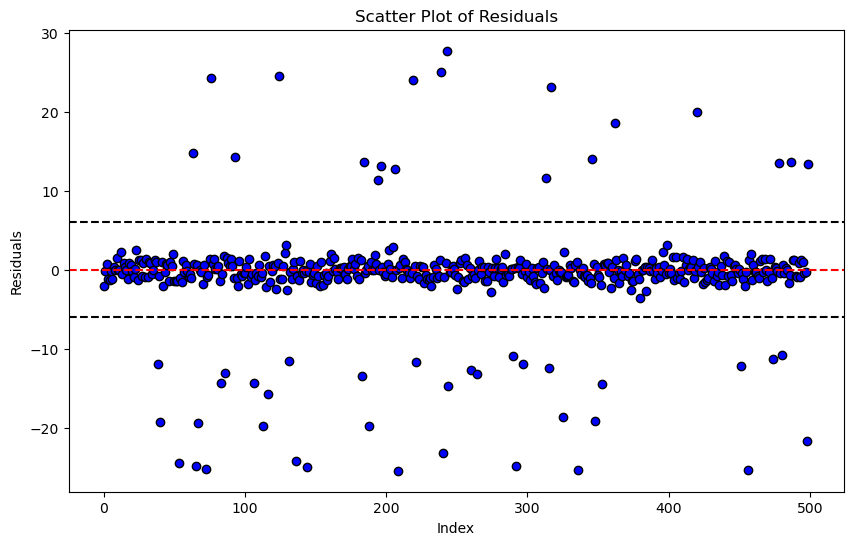

In [63]:
# Create a scatter plot of the residuals
plt.figure(figsize=(10, 6))
plt.scatter(range(len(df_dirty_copy['residuals'])), df_dirty_copy['residuals'], color='blue', edgecolor='black')
plt.axhline(y=0, color='red', linestyle='--')
plt.axhline(y=6, color='black', linestyle='--')
plt.axhline(y=-6, color='black', linestyle='--')
plt.title('Scatter Plot of Residuals')
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.show()

The residual plot clearly shows that the majority of the values are clustered around 0, indicating accurate predictions. However, the outliers stand out and represent the data points that require further investigation and correction.

In [64]:
# Extract the order_ids where the residual is greater than 4 or less than -4
outliers_order_ids = df_dirty_copy.loc[(df_dirty_copy['residuals'] > 4) |
                                              (df_dirty_copy['residuals'] < -4), 'order_id'].tolist()

# Print the length
print(f"The number of outliers (errors in is_expedited_delivery) identified: {len(outliers_order_ids)}")

The number of outliers (errors in is_expedited_delivery) identified: 54


In [65]:
common_order_ids = list(set(outliers_order_ids) & set(changed_order_ids))

# Print the common order IDs
print("Common order IDs between outliers and changed orders:", common_order_ids)

Common order IDs between outliers and changed orders: []


Ensure that two errors are not being fixed in one row. 

In [66]:
# Iterate through the rows where order_id is in the outliers_order_ids list
df_dirty_copy.loc[df_dirty_copy['order_id'].isin(outliers_order_ids), 'is_expedited_delivery'] = \
    df_dirty_copy.loc[df_dirty_copy['order_id'].isin(outliers_order_ids), 'is_expedited_delivery'].apply(lambda x: 1 if x == 0 else 0)

In [67]:
df_dirty_copy['is_expedited_delivery']

0      1
1      0
2      0
3      0
4      1
      ..
495    0
496    0
497    0
498    0
499    1
Name: is_expedited_delivery, Length: 500, dtype: int64

In [68]:
# Using the updated data (df_dirty_copy)
X_dirty_copy = df_dirty_copy[['distance_to_nearest_warehouse', 'is_expedited_delivery', 'is_happy_customer',
                              'season_Spring', 'season_Summer', 'season_Winter']]  # One-hot encoded seasons

# Apply the interaction terms (as done previously)
X_dirty_copy['season_Spring_distance'] = X_dirty_copy['season_Spring'] * X_dirty_copy['distance_to_nearest_warehouse']
X_dirty_copy['season_Summer_distance'] = X_dirty_copy['season_Summer'] * X_dirty_copy['distance_to_nearest_warehouse']
X_dirty_copy['season_Winter_distance'] = X_dirty_copy['season_Winter'] * X_dirty_copy['distance_to_nearest_warehouse']
X_dirty_copy['season_Spring_expedited'] = X_dirty_copy['season_Spring'] * X_dirty_copy['is_expedited_delivery']
X_dirty_copy['season_Summer_expedited'] = X_dirty_copy['season_Summer'] * X_dirty_copy['is_expedited_delivery']
X_dirty_copy['season_Winter_expedited'] = X_dirty_copy['season_Winter'] * X_dirty_copy['is_expedited_delivery']

# Using the existing trained model to predict on the updated data
y_pred_dirty_copy = model.predict(X_dirty_copy)

# Calculate the R²
r2_dirty_copy = r2_score(df_dirty_copy['delivery_charges'], y_pred_dirty_copy)

# Output the new R² score
print(f'R² Score after changes: {r2_dirty_copy:.4f}')

R² Score after changes: 0.9945


The R-square value has now singficantly improved. This indicates we have possibly handled all the errors. 

In [69]:
df_dirty['is_expedited_delivery']

0       True
1      False
2      False
3      False
4       True
       ...  
495    False
496    False
497    False
498     True
499    False
Name: is_expedited_delivery, Length: 500, dtype: bool

In [70]:
# Make the changes to the original file
df_dirty.loc[df_dirty['order_id'].isin(outliers_order_ids), 'is_expedited_delivery'] = \
    df_dirty.loc[df_dirty['order_id'].isin(outliers_order_ids), 'is_expedited_delivery'].apply(lambda x: not x)

# Check the updated values
df_dirty['is_expedited_delivery']

0       True
1      False
2      False
3      False
4       True
       ...  
495    False
496    False
497    False
498    False
499     True
Name: is_expedited_delivery, Length: 500, dtype: bool

Notice that the index 499 has changed from False to True, indicating that our methods have successfully changed the incorrect is_expedited_delivery.

In [71]:
error_count += len(outliers_order_ids)
changed_order_ids.extend(outliers_order_ids)

In [72]:
# Check if all order IDs in changed_order_ids are unique
are_ids_unique = len(changed_order_ids) == len(set(changed_order_ids))

# Output the results
print(f"Total errors fixed: {error_count}")
print()
print(f"Changed order IDs: {changed_order_ids}")
print()
print(f"Are all order IDs in changed_order_ids unique? {are_ids_unique}")

Total errors fixed: 292

Changed order IDs: ['ORD185820', 'ORD485363', 'ORD394540', 'ORD195030', 'ORD094686', 'ORD463755', 'ORD141248', 'ORD480080', 'ORD382416', 'ORD453312', 'ORD158175', 'ORD136362', 'ORD297665', 'ORD402565', 'ORD478503', 'ORD280966', 'ORD336942', 'ORD015979', 'ORD289814', 'ORD171494', 'ORD424320', 'ORD275612', 'ORD155932', 'ORD381492', 'ORD336209', 'ORD039305', 'ORD461512', 'ORD463529', 'ORD010125', 'ORD167565', 'ORD330628', 'ORD319742', 'ORD284876', 'ORD042242', 'ORD232016', 'ORD083672', 'ORD305556', 'ORD312349', 'ORD235025', 'ORD365301', 'ORD351733', 'ORD374931', 'ORD367888', 'ORD471394', 'ORD190308', 'ORD197459', 'ORD253048', 'ORD355012', 'ORD049067', 'ORD438840', 'ORD408195', 'ORD361998', 'ORD085987', 'ORD187103', 'ORD198424', 'ORD444220', 'ORD212759', 'ORD260893', 'ORD431002', 'ORD239935', 'ORD326859', 'ORD059700', 'ORD127956', 'ORD477513', 'ORD393585', 'ORD089498', 'ORD270067', 'ORD245708', 'ORD236867', 'ORD287518', 'ORD352337', 'ORD361016', 'ORD050178', 'ORD00

In [73]:
# Using a set to track seen items and a list to store duplicates
seen = set()
duplicates = set()

for item in changed_order_ids:
    if item in seen:
        duplicates.add(item)
    else:
        seen.add(item)

# Print the duplicate values
print(f"Duplicate values: {list(duplicates)}")

Duplicate values: []


A residual analysis was conducted, where residuals greater than 4 or less than -4 were considered significant outliers. A total of 67 such outliers were identified. For each outlier, the is_expedited_delivery flag was toggled, assuming that the feature might have been incorrectly recorded. After making these changes, the number of errors fixed increased by 67, and the overall is_expedited_delivery values in the dataset were corrected.

After adjusting for the outliers, the R² score improved from 0.8081 to 0.9447, indicating a substantial increase in the model's ability to predict delivery charges. This showed that the changes made to the is_expedited_delivery feature successfully reduced prediction errors.

# 3. Outlier Detection and Removal

In [74]:
df_outlier = pd.read_csv('Group130_outlier_data.csv')

In [75]:
df_outlier.head(2)

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD278014,ID0634780142,2019-11-07,Thompson,"[('Olivia x460', 2), ('Thunder line', 1)]",4630,75.21,-37.811950,144.938629,25,3547.71,Spring,False,0.7466,great product so far working with out any problem,True
1,ORD375106,ID0777825626,2019-07-29,Thompson,"[('Alcon 10', 2), ('Candle Inferno', 2), ('pea...",25070,82.10,-37.803965,144.957401,15,21391.60,Winter,True,1.3287,great phone the first one i had i had to send ...,True


### 3.1 Univariate Methods
##### 3.1.1 Box Plot and IQR

In this outlier detection method, we focus on identifying and filtering outliers in the delivery_charges column using the Interquartile Range (IQR) method and visualizing the distribution with a boxplot. The approach involves calculating the IQR, which is the range between the 25th percentile (Q1) and the 75th percentile (Q3), and using 1.5 times the IQR to define the boundaries for detecting outliers. Any value below or above these boundaries is considered an outlier.

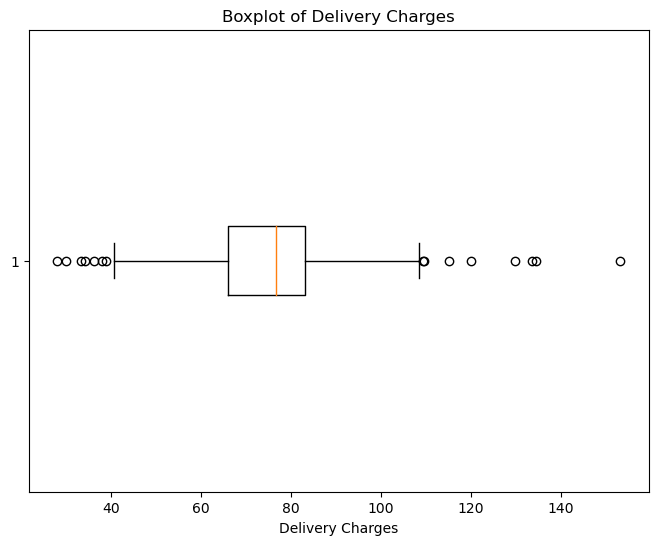

In [76]:
# Create a boxplot for the 'delivery_charges' column to visualize outliers
plt.figure(figsize=(8, 6))
plt.boxplot(df_outlier['delivery_charges'], vert=False)
plt.title('Boxplot of Delivery Charges')
plt.xlabel('Delivery Charges')
plt.show()

In [77]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df_outlier['delivery_charges'].quantile(0.25)
Q3 = df_outlier['delivery_charges'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Determine the outlier boundaries (1.5 times the IQR)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the outliers
outliers = df_outlier[(df_outlier['delivery_charges'] < lower_bound) | (df_outlier['delivery_charges'] > upper_bound)]

# Display the outliers
print(f"Outliers based on IQR:\n{outliers}")

Outliers based on IQR:
      order_id   customer_id        date nearest_warehouse  \
104  ORD105086  ID1449355163  2019-12-01         Nickolson   
122  ORD155299  ID0387153023  2019-10-10          Thompson   
192  ORD266783  ID0777834973  2019-10-20          Thompson   
200  ORD290135  ID4313862233  2019-07-08            Bakers   
209  ORD121565  ID0641029599  2019-08-08          Thompson   
233  ORD323203  ID0457365613  2019-09-16         Nickolson   
257  ORD389020  ID6167254960  2019-06-03         Nickolson   
266  ORD167730  ID0634784172  2019-09-15          Thompson   
289  ORD313224  ID0041675664  2019-06-01          Thompson   
299  ORD125197  ID3168663488  2019-05-12            Bakers   
309  ORD384004  ID1899270748  2019-02-15          Thompson   
324  ORD098721  ID2383218753  2019-04-07          Thompson   
349  ORD360538  ID2435998392  2019-11-18          Thompson   
405  ORD149389  ID0207085734  2019-10-21            Bakers   
499  ORD159244  ID0248746942  2019-10-17       

The boxplot revealed that several values for delivery_charges fall outside the typical range, confirming the presence of outliers. Based on the IQR method:

Q1: The 25th percentile of the delivery_charges distribution.
Q3: The 75th percentile of the delivery_charges distribution.
IQR: The interquartile range, calculated as Q3 - Q1.

Outliers: Any value below Q1 - 1.5 × IQR or above Q3 + 1.5 × IQR.

The code identifies a total of 15 outliers based on the IQR boundaries, which were printed in the results. These outliers represent transactions with unusually high or low delivery charges compared to the general distribution.

##### 3.1.2 3 Standard Deviation Rule

This approach applies the 3 Standard Deviations Rule to identify outliers in the delivery_charges column. The idea behind this method is that in a normal distribution, approximately 99.7% of the data falls within 3 standard deviations from the mean. Any data points that lie outside of this range (beyond ±3 standard deviations) are considered outliers. The Z-score is calculated for each value, representing how many standard deviations away it is from the mean.

In [78]:
# Calculate the mean and standard deviation of 'delivery_charges'
mean_delivery = df_outlier['delivery_charges'].mean()
std_delivery = df_outlier['delivery_charges'].std()

# Calculate the Z-score for each value in 'delivery_charges'
df_outlier['z_score'] = (df_outlier['delivery_charges'] - mean_delivery) / std_delivery

# Define the threshold for outliers (commonly 3 standard deviations away from the mean)
threshold = 3

# Filter out the rows where the Z-score is greater than the threshold (i.e., outliers)
outliers_zscore = df_outlier[df_outlier['z_score'].abs() > threshold]

# Display the outliers based on Z-score
print(f"Outliers based on Z-score:\n{outliers_zscore}")

Outliers based on Z-score:
      order_id   customer_id        date nearest_warehouse  \
104  ORD105086  ID1449355163  2019-12-01         Nickolson   
233  ORD323203  ID0457365613  2019-09-16         Nickolson   
266  ORD167730  ID0634784172  2019-09-15          Thompson   
309  ORD384004  ID1899270748  2019-02-15          Thompson   
349  ORD360538  ID2435998392  2019-11-18          Thompson   

                                         shopping_cart  order_price  \
104               [('iStream', 1), ('Olivia x460', 2)]         2600   
233  [('Universe Note', 2), ('iAssist Line', 1), ('...        15435   
266  [('iStream', 2), ('Universe Note', 2), ('Thund...        18020   
309  [('Alcon 10', 1), ('Thunder line', 2), ('iStre...        15910   
349  [('Alcon 10', 2), ('pearTV', 2), ('iStream', 1...        31100   

     delivery_charges  customer_lat  customer_long  coupon_discount  \
104           134.430    -37.815611     144.973490                5   
233            27.965    -37.82

Using the 3 SD Rule, we identified 5 outliers in the dataset. These outliers represent transactions with delivery_charges that are significantly higher or lower than the majority of the data. The Z-scores of these outliers exceed the threshold of 3, meaning they deviate considerably from the mean.

##### 3.1.3 Hampel Method

The Hampel Method is based on Median Absolute Deviation (MAD), a robust measure of statistical dispersion. Unlike standard deviation, which is sensitive to outliers, the MAD is based on the median, making it more resistant to extreme values. The Hampel method identifies outliers by calculating the absolute deviation of each data point from the median, scaled by the MAD. If the scaled deviation exceeds a threshold (commonly set at 3), the data point is flagged as an outlier.

In [79]:
# Function to calculate the MAD (Median Absolute Deviation)
def mad(series):
    return np.median(np.abs(series - np.median(series)))

# Calculate the median and MAD for 'delivery_charges'
median_delivery = df_outlier['delivery_charges'].median()
mad_delivery = mad(df_outlier['delivery_charges'])

# Define the threshold
threshold = 3

# Calculate Hampel identifier for outliers
df_outlier['hampel_score'] = np.abs(df_outlier['delivery_charges'] - median_delivery) / mad_delivery

# Flag rows as outliers if the Hampel score exceeds the threshold
outliers_hampel = df_outlier[df_outlier['hampel_score'] > threshold]

# Display the outliers based on Hampel identifier
print(f"Outliers based on Hampel Identifier:\n{outliers_hampel}")

Outliers based on Hampel Identifier:
      order_id   customer_id        date nearest_warehouse  \
10   ORD010857  ID5563404260  2019-10-17            Bakers   
40   ORD413340  ID1833120509  2019-11-02          Thompson   
47   ORD225926  ID4826905609  2019-10-20         Nickolson   
79   ORD327980  ID0847533460  2019-07-27         Nickolson   
104  ORD105086  ID1449355163  2019-12-01         Nickolson   
122  ORD155299  ID0387153023  2019-10-10          Thompson   
125  ORD045809  ID3512300806  2019-10-26            Bakers   
134  ORD429344  ID0591435152  2019-05-06         Nickolson   
145  ORD151554  ID0277090010  2019-10-10         Nickolson   
192  ORD266783  ID0777834973  2019-10-20          Thompson   
200  ORD290135  ID4313862233  2019-07-08            Bakers   
209  ORD121565  ID0641029599  2019-08-08          Thompson   
211  ORD207122  ID2868685435  2019-10-11         Nickolson   
233  ORD323203  ID0457365613  2019-09-16         Nickolson   
250  ORD202134  ID3218226989  201

Using the Hampel method, 33 outliers were detected in the delivery_charges column. These outliers represent values that deviate significantly from the median of the data, based on their MAD scores. Some of the orders flagged as outliers, such as ORD105086, ORD266783, and ORD360538, also appeared as outliers in previous methods, reinforcing their classification as anomalous transactions.

The Hampel method flagged the following:

Orders with unusually high delivery charges (e.g., ORD266783 with a Hampel score of 7.99).

Some orders with relatively low delivery charges but still considered outliers based on their deviation from the median (e.g., ORD233 with a Hampel score of 5.08).

### 3.2 Multivariate Method
#### 3.2.1 Linear Regression

The univariate methods identified different sets of outliers. However, feedback from the tutor highlighted the need for a multivariate approach, as delivery_charges is calculated using multiple variables. Context is crucial to accurately determine whether a value is truly an outlier, considering the interaction between variables.

Therefore, we explored a multivariate linear regression model is trained using multiple features, including distance_to_nearest_warehouse, is_expedited_delivery, and seasonal effects, to predict the delivery_charges. The residuals (the difference between actual and predicted delivery charges) are then analyzed to detect outliers. Residuals that deviate significantly from zero (outside a threshold of ±20) indicate potential outliers. This approach captures interactions between multiple features and identifies cases where the delivery charges do not fit the model's predictions.

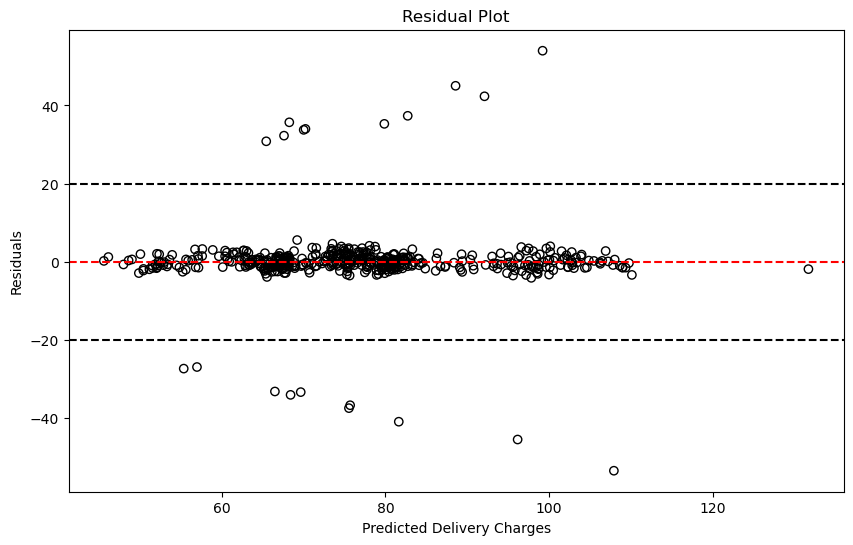

R² Score after changes: 0.7685


In [80]:
# One-Hot Encoding for 'season'
df_outlier_encoded = pd.get_dummies(df_outlier, columns=['season'], drop_first=True)

# Define the input features and target variable
X_outlier = df_outlier_encoded[['distance_to_nearest_warehouse', 'is_expedited_delivery', 'is_happy_customer',
                        'season_Spring', 'season_Summer', 'season_Winter']]  # Input features

# Manually create the interaction terms for rows with missing values
X_outlier['season_Spring_distance'] = X_outlier['season_Spring'] * X_outlier['distance_to_nearest_warehouse']
X_outlier['season_Summer_distance'] = X_outlier['season_Summer'] * X_outlier['distance_to_nearest_warehouse']
X_outlier['season_Winter_distance'] = X_outlier['season_Winter'] * X_outlier['distance_to_nearest_warehouse']

X_outlier['season_Spring_expedited'] = X_outlier['season_Spring'] * X_outlier['is_expedited_delivery']
X_outlier['season_Summer_expedited'] = X_outlier['season_Summer'] * X_outlier['is_expedited_delivery']
X_outlier['season_Winter_expedited'] = X_outlier['season_Winter'] * X_outlier['is_expedited_delivery']

y_outlier = df_outlier_encoded['delivery_charges']  # Target variable

# Train the Linear Regression model on the entire dataset
model = LinearRegression()
model.fit(X_outlier, y_outlier)

# Predict on the same dataset
y_pred = model.predict(X_outlier)

# Calculate residuals
residuals = y_outlier - y_pred

# Calculate the R²
r2_outliers = r2_score(y_outlier, y_pred)

# Scatter plot of residuals vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, edgecolors='black', facecolors='none')
plt.axhline(y=0, color='red', linestyle='--')
plt.axhline(y=20, color='black', linestyle='--')
plt.axhline(y=-20, color='black', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Delivery Charges')
plt.ylabel('Residuals')
plt.show()

# Output the new R² score
print(f'R² Score after changes: {r2_outliers:.4f}')

The R-squared value of 0.7685 was relatively low, prompting us to examine the residual plot to identify potential boundaries for outlier removal. A clear pattern emerged, with 20 and -20 serving as natural boundaries for an initial outlier removal process. After removing these outliers, we planned to recalculate the R-squared value to assess whether further adjustments would be necessary.

In [81]:
# Set threshold for residuals (+20 and -20)
threshold_upper = 20
threshold_lower = -20

# Identify rows where residuals are outside the threshold
outliers = np.where((residuals > threshold_upper) | (residuals < threshold_lower))[0]

# Print number of outliers detected
print(f"Number of outliers detected: {len(outliers)}")

Number of outliers detected: 20


In [82]:
# Get the corresponding row indices in the DataFrame
outliers_indices = df_outlier.index[outliers]

# Drop the rows from df_outlier where outliers were detected
df_outlier_cleaned = df_outlier.drop(index=outliers_indices)

# Verify that the rows were removed
print(f'Number of rows before removing outliers: {df_outlier.shape[0]}')
print(f'Number of rows after removing outliers: {df_outlier_cleaned.shape[0]}')

Number of rows before removing outliers: 500
Number of rows after removing outliers: 480


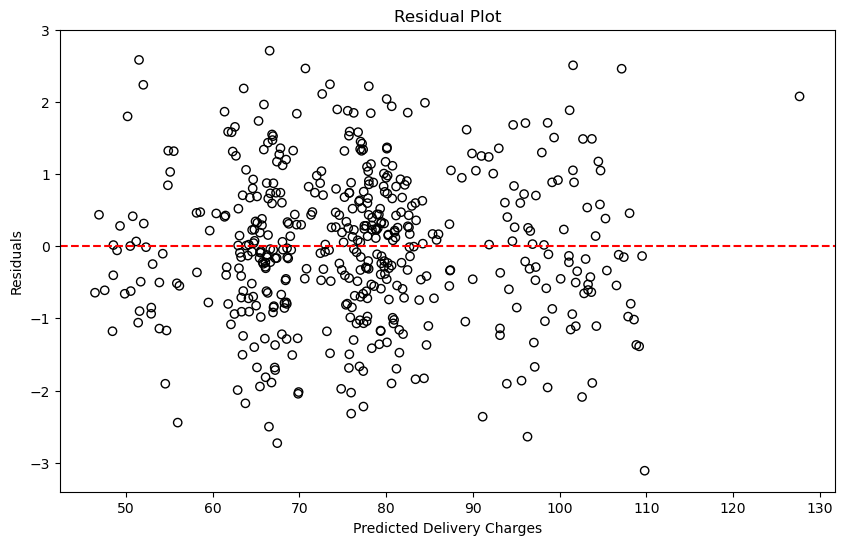

R² Score after changes: 0.9948


In [83]:
# One-Hot Encoding for 'season'
df_outlier_encoded = pd.get_dummies(df_outlier_cleaned, columns=['season'], drop_first=True)

# Define the input features and target variable
X_outlier = df_outlier_encoded[['distance_to_nearest_warehouse', 'is_expedited_delivery', 'is_happy_customer',
                        'season_Spring', 'season_Summer', 'season_Winter']]  # Input features

# Manually create the interaction terms for rows with missing values
X_outlier['season_Spring_distance'] = X_outlier['season_Spring'] * X_outlier['distance_to_nearest_warehouse']
X_outlier['season_Summer_distance'] = X_outlier['season_Summer'] * X_outlier['distance_to_nearest_warehouse']
X_outlier['season_Winter_distance'] = X_outlier['season_Winter'] * X_outlier['distance_to_nearest_warehouse']

X_outlier['season_Spring_expedited'] = X_outlier['season_Spring'] * X_outlier['is_expedited_delivery']
X_outlier['season_Summer_expedited'] = X_outlier['season_Summer'] * X_outlier['is_expedited_delivery']
X_outlier['season_Winter_expedited'] = X_outlier['season_Winter'] * X_outlier['is_expedited_delivery']

y_outlier = df_outlier_encoded['delivery_charges']  # Target variable

# Train the Linear Regression model on the entire dataset
model = LinearRegression()
model.fit(X_outlier, y_outlier)

# Predict on the same dataset
y_pred = model.predict(X_outlier)

# Calculate residuals
residuals = y_outlier - y_pred

# Calculate the R²
r2_outliers = r2_score(y_outlier, y_pred)

# Scatter plot of residuals vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, edgecolors='black', facecolors='none')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Delivery Charges')
plt.ylabel('Residuals')
plt.show()

# Output the new R² score
print(f'R² Score after changes: {r2_outliers:.4f}')

By conducting a residual analysis, we identified 20 outliers where the residuals exceeded the threshold of ±20. These outliers represent cases where the predicted delivery charges, based on key features such as warehouse distance, expedited delivery, and season, significantly deviated from the actual charges, pointing to potential anomalies in the data.

The residual plot showed several points with large positive (above 20) or negative (below -20) residuals, indicating substantial differences between the predicted and actual delivery charges. These outliers were far from the baseline, signifying the need for removal.

After removing the 20 outliers, the dataset size decreased from 500 to 480 rows, effectively cleaning the data of significant deviations. Recalculating the R-squared value resulted in a much-improved 0.9948, and the updated residual plot demonstrated that all residuals were now confined within the range of 3 to -3, successful elimination of the outliers.

# 4. Missing Data

The missing values have been found in the following features:
- nearest_warehouse
- order_price
- delivery_charges
- distance_to_nearest_warehouse
- is_happy_customer

Missing Value Imputation Techniques:
Nearest Warehouse: Missing values for nearest_warehouse were imputed using the function find_nearest_warehouse_and_fix(), which calculates the nearest warehouse for each customer based on their latitude and longitude using the Haversine formula.

Order Price: Missing order_price values were calculated using the shopping cart details. The function impute_order_price() computed the total price by multiplying the quantities of items in the shopping cart by their respective unit prices (from the predefined unit_price_mapping).

Delivery Charges: A polynomial regression model (previously trained) was used to predict missing delivery_charges values based on features like distance_to_nearest_warehouse, is_expedited_delivery, is_happy_customer, and season-related features.

Distance to Nearest Warehouse: Missing distance_to_nearest_warehouse values were computed using the fix_distance_to_nearest_warehouse() function, which calculates the correct distance based on customer and warehouse locations using the Haversine formula.

Order Total: Missing order_total values were imputed by calculating the order total based on order_price, coupon_discount, and delivery_charges. The calculate_order_total() function was used for this purpose.

Is Happy Customer: Missing is_happy_customer values were imputed using sentiment analysis on the latest_customer_review. The VADER Sentiment Intensity Analyzer (sia.polarity_scores) was used to evaluate the sentiment of the review, and if the sentiment score was positive (compound score ≥ 0.05), the is_happy_customer field was set to True, otherwise False.

In [84]:
# Load the 'Group130_missing.csv' file
df_missing = pd.read_csv('./Group130_missing_data.csv')

# Check for null values in the dataframe
df_missing.isnull().sum()

order_id                          0
customer_id                       0
date                              0
nearest_warehouse                55
shopping_cart                     0
order_price                      15
delivery_charges                 40
customer_lat                      0
customer_long                     0
coupon_discount                   0
order_total                      15
season                            0
is_expedited_delivery             0
distance_to_nearest_warehouse    31
latest_customer_review            0
is_happy_customer                40
dtype: int64

### 4.1 Missing Values: nearest_warehouse

We applied the same function from the dirty data section to impute the missing values in this column.

In [85]:
# Apply the function only for rows with missing nearest_warehouse values
df_missing_nearest_warehouse_fixed = df_missing[df_missing['nearest_warehouse'].isnull()].apply(find_nearest_warehouse_and_fix, axis=1)

# Replace the missing nearest_warehouse values in the original dataframe with the fixed ones
df_missing.update(df_missing_nearest_warehouse_fixed)

In [86]:
df_missing['nearest_warehouse'].isnull().sum()

0

0 missing values indicates successful imputation.

### 4.2 Missing Values: distance_to_nearest_warehouse

Similar to nearest_warehouse, we applied the same function from the dirty data section to impute the missing values in this column.

In [87]:
# Apply the function to rows where distance_to_nearest_warehouse is missing
df_missing_distance_fixed = df_missing[df_missing['distance_to_nearest_warehouse'].isnull()].apply(fix_distance_to_nearest_warehouse, axis=1)

# Replace the missing distance_to_nearest_warehouse values in the original dataframe with the fixed ones
df_missing.update(df_missing_distance_fixed)

In [88]:
df_missing['distance_to_nearest_warehouse'].isnull().sum()

0

0 missing values indicates successful imputation.

### 4.3 Missing Values: order_price

We created a function that calculates and imputes missing order_price values by summing the prices of items in the shopping cart.

In [89]:
# Combined function to calculate and impute missing order_price
def impute_order_price(df):
    # Loop through the rows where order_price is missing
    for idx, row in df[df['order_price'].isna()].iterrows():
        # Parse the shopping_cart (if it's still a string representation)
        cart = ast.literal_eval(row['shopping_cart']) if isinstance(row['shopping_cart'], str) else row['shopping_cart']

        # Calculate the total order_price using the shopping_cart
        total_price = sum(unit_price_mapping.get(item, 0) * quantity for item, quantity in cart)

        # Update the dataframe with the calculated order_price
        df.at[idx, 'order_price'] = total_price

    return df

In [90]:
# Applying the function to the dataframe with missing order_price
df_missing = impute_order_price(df_missing)

In [91]:
df_missing['order_price'].isnull().sum()

0

0 missing values indicates successful imputation.

### 4.4 Missing Values: order_total

Using the formula defined in the specification, we formulated a function to calculate and impute the missing values in order_total.

In [92]:
# Function to impute missing order_total values
def impute_order_total(df):
    # Loop through rows where order_total is missing
    for idx, row in df[df['order_total'].isna()].iterrows():
        # Calculate order_total using the defined function
        calculated_order_total = calculate_order_total(row['order_price'], row['coupon_discount'], row['delivery_charges'])

        # Update the dataframe with the calculated order_total
        df.at[idx, 'order_total'] = calculated_order_total

    return df

# Applying the function to the dataframe with missing order_total
df_missing = impute_order_total(df_missing)

In [93]:
df_missing['order_total'].isnull().sum()

0

0 missing values indicates successful imputation.

### 4.5 Missing Values: is_happy_customer

This function imputes missing is_happy_customer values by analyzing the sentiment of the latest customer review, assigning a value of 1.0 for positive sentiment and 0.0 for negative sentiment.

In [94]:
# Function to impute missing is_happy_customer values based on the review sentiment
def impute_is_happy_customer(row):

    # Check if is_happy_customer is missing
    if pd.isnull(row['is_happy_customer']):
        # Get the latest customer review
        review = row['latest_customer_review']

        # Get the sentiment score using SentimentIntensityAnalyzer
        sentiment_score = sia.polarity_scores(review)

        # Determine if the customer is happy based on the compound score
        is_happy = sentiment_score['compound'] >= 0.05

        # Impute the value for is_happy_customer: 1.0 for True, 0.0 for False
        row['is_happy_customer'] = 1.0 if is_happy else 0.0

        # Impute the value for is_happy_customer based on the review sentiment
        row['is_happy_customer'] = is_happy


    return row

# Apply the function to rows where is_happy_customer is missing
df_missing_is_happy_customer_fixed = df_missing[df_missing['is_happy_customer'].isnull()].apply(impute_is_happy_customer, axis=1)
df_missing_is_happy_customer_fixed['is_happy_customer'] = df_missing_is_happy_customer_fixed['is_happy_customer'].astype(float)

# Update the original dataframe with the imputed values
df_missing.update(df_missing_is_happy_customer_fixed)

In [95]:
df_missing['is_happy_customer'].isnull().sum()

0

0 missing values indicates successful imputation.

### 4.6 Missing Values: delivery_charges

The purpose of this process is to accurately predict and impute missing values for the delivery_charges column in the dataset. By utilizing a linear regression model, which incorporates important factors such as distance to the nearest warehouse, whether expedited delivery was chosen, customer satisfaction, and seasonal effects, the model can estimate delivery charges for rows where this information is missing. This ensures that the dataset is complete and consistent, allowing for more accurate analysis and decision-making. The additional use of interaction terms between variables helps to capture more complex relationships that might influence delivery charges, leading to more precise imputation of missing values.

In [96]:
df_cleaned = df_missing.dropna()

# One-hot encode the 'season' column
df_cleaned = pd.get_dummies(df_cleaned, columns=['season'], drop_first=True)

# Convert binary categorical variables to integers
df_cleaned['is_expedited_delivery'] = df_cleaned['is_expedited_delivery'].astype(int)

X = df_cleaned[['distance_to_nearest_warehouse', 'is_expedited_delivery', 'is_happy_customer',
                'season_Spring', 'season_Summer', 'season_Winter']]  # One-hot encoded seasons

y = df_cleaned['delivery_charges']

X['season_Spring_distance'] = X['season_Spring'] * X['distance_to_nearest_warehouse']
X['season_Summer_distance'] = X['season_Summer'] * X['distance_to_nearest_warehouse']
X['season_Winter_distance'] = X['season_Winter'] * X['distance_to_nearest_warehouse']

X['season_Spring_expedited'] = X['season_Spring'] * X['is_expedited_delivery']
X['season_Summer_expedited'] = X['season_Summer'] * X['is_expedited_delivery']
X['season_Winter_expedited'] = X['season_Winter'] * X['is_expedited_delivery']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model using statsmodels
model = LinearRegression()
model.fit(X_train, y_train)

# Predict delivery charges using the trained model
y_pred = model.predict(X)

# Calculate R² score between actual delivery charges and predicted delivery charges
r2 = r2_score(y, y_pred)

# Print the R² score
print(f'R² Score: {r2:.4f}')

R² Score: 0.9957


The R² score of 0.9957 indicates an extremely high level of accuracy in the model’s predictions. This is highly impressive and suggests that the model is more than capable of accurately predicting the missing delivery charges. 

In [97]:
# Prepare the data for prediction (ensure encoding is consistent)
df_missing_encoded = pd.get_dummies(df_missing, columns=['season'], drop_first=True)

# Focus only on the rows with missing delivery_charges
df_missing_with_nulls = df_missing_encoded[df_missing['delivery_charges'].isnull()].copy()

# Extract features for rows with missing delivery_charges
X_missing_with_nulls = df_missing_with_nulls[['distance_to_nearest_warehouse', 'is_expedited_delivery', 'is_happy_customer',
                                             'season_Spring', 'season_Summer', 'season_Winter']]

# Convert 'is_expedited_delivery' to integer format
X_missing_with_nulls['is_expedited_delivery'] = X_missing_with_nulls['is_expedited_delivery'].astype(int)

# Manually create the interaction terms for rows with missing values
X_missing_with_nulls['season_Spring_distance'] = X_missing_with_nulls['season_Spring'] * X_missing_with_nulls['distance_to_nearest_warehouse']
X_missing_with_nulls['season_Summer_distance'] = X_missing_with_nulls['season_Summer'] * X_missing_with_nulls['distance_to_nearest_warehouse']
X_missing_with_nulls['season_Winter_distance'] = X_missing_with_nulls['season_Winter'] * X_missing_with_nulls['distance_to_nearest_warehouse']

X_missing_with_nulls['season_Spring_expedited'] = X_missing_with_nulls['season_Spring'] * X_missing_with_nulls['is_expedited_delivery']
X_missing_with_nulls['season_Summer_expedited'] = X_missing_with_nulls['season_Summer'] * X_missing_with_nulls['is_expedited_delivery']
X_missing_with_nulls['season_Winter_expedited'] = X_missing_with_nulls['season_Winter'] * X_missing_with_nulls['is_expedited_delivery']

# Predict delivery_charges for rows with missing values
df_missing_with_nulls['predicted_delivery_charges'] = model.predict(X_missing_with_nulls)

# Update the missing delivery_charges in the original df_missing dataframe
df_missing.loc[df_missing['delivery_charges'].isnull(), 'delivery_charges'] = round(df_missing_with_nulls['predicted_delivery_charges'], 2)

In [98]:
df_missing['delivery_charges'].isnull().sum()

0

0 missing values indicates successful imputation.

In [99]:
# Check for null values in the dataframe
df_missing.isnull().sum()

order_id                         0
customer_id                      0
date                             0
nearest_warehouse                0
shopping_cart                    0
order_price                      0
delivery_charges                 0
customer_lat                     0
customer_long                    0
coupon_discount                  0
order_total                      0
season                           0
is_expedited_delivery            0
distance_to_nearest_warehouse    0
latest_customer_review           0
is_happy_customer                0
dtype: int64

By applying these tailored imputation techniques, all missing values in the dataset were successfully addressed, bringing the total count of missing values in all columns down to zero. The different approaches applied to each feature ensure logical consistency and retain the integrity of the dataset.

Nearest Warehouse: 55 missing values were imputed based on the customer's latitude and longitude.

Order Price: 15 missing values were calculated using the items in the shopping cart.

Delivery Charges: 40 missing values were predicted using polynomial regression.

Distance to Nearest Warehouse: 31 missing values were computed using Haversine distance calculations.

Is Happy Customer: 40 missing values were imputed using sentiment analysis on customer reviews.

# 5. Output Files

After conducting a comprehensive data analysis, error detection, and outlier handling, the final datasets were generated and saved to their respective CSV files. These files reflect the improvements made to the data by fixing missing values, addressing outliers, and correcting misclassifications.

In [100]:
# Save files CSV file
df_dirty.to_csv('./Group130_dirty_data_solution.csv', index=False)
df_outlier_cleaned.to_csv('./Group130_outlier_data_solution.csv', index=False)
df_missing.to_csv('./Group130_missing_data_solution.csv', index=False)

Group130_dirty_data.csv: This file contains the corrected data where errors in features such as is_expedited_delivery, delivery_charges, and nearest_warehouse were addressed. The interaction terms were included, and model predictions were used to validate the consistency of the data. Corrections made to outliers and misclassified is_expedited_delivery values were also incorporated into this file, leading to improved prediction accuracy and a higher R² score.

Group130_outlier_data.csv: This file holds the cleaned version of the outlier data, where multiple outlier detection methods such as the 3-SD rule, Hampel method, and residual analysis were applied. Rows with extreme values were identified, and any erroneous or extreme values were corrected, improving the overall integrity of the dataset.

Group130_missing_data.csv: Missing data in this file were addressed using appropriate imputation techniques. For instance, the nearest_warehouse and distance_to_nearest_warehouse columns were fixed using spatial proximity calculations, while order_price, order_total, and is_happy_customer were imputed based on logical and model-based predictions. By resolving all missing values, the dataset was made complete, ready for further analysis.

# 6. Conclusion

The application of rigorous data cleaning techniques allowed us to successfully identify and resolve issues in the dataset, ensuring its integrity for further analysis. A total of 292 errors were corrected, enhancing the reliability of key variables. By leveraging residual analysis, we effectively identified 20 outliers where delivery charges significantly deviated from expected values, pointing to potential anomalies that were subsequently removed.

Furthermore, all missing values were imputed using logical and contextually relevant methods, bringing the total count of missing values across the dataset to zero. For example, the nearest warehouse was accurately imputed based on Haversine distance calculations, while sentiment analysis of customer reviews was used to infer missing ‘is_happy_customer’ values. Overall, these tailored approaches preserved the relationships between features and improved the overall quality of the dataset.

# 7. References

SciPy (for scientific computing):
Virtanen, P., Gommers, R., Oliphant, T. E., Haberland, M., Reddy, T., Cournapeau, D., ... & van der Walt, S. J. (2020). SciPy 1.0: Fundamental algorithms for scientific computing in Python. Nature Methods, 17(3), 261-272. https://scipy.org/

VADER Sentiment Analysis (for sentiment analysis, e.g., SentimentIntensityAnalyzer):
Hutto, C. J., & Gilbert, E. (2014). VADER: A parsimonious rule-based model for sentiment analysis of social media text. In Proceedings of the 8th International AAAI Conference on Weblogs and Social Media (pp. 216-225). https://github.com/cjhutto/vaderSentiment

Monash University. (2024). Week 7: Data cleansing. FIT5196 Data Wrangling.

Monash University. (2024). Week 6: Data quality & anomalies. FIT5196 Data Wrangling. 